# SF1626 Lecture highlights: Chapter 14
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

Lecture 1: 14.1, 14.2

Lecture 2: 14.3, 14.4

Lecture 3: 14.5, 14.6, 14.7


**You need to know what a Riemann sum is, and how to use it to define integration**

### Riemann Sum

Defined by 

* A rectangular domain $D$
* An *integrant* $f(x,y)$ (a function to integrate in the rectangular domain)
* A partition, $P$, of a rectangular  domain $D$

**Riemann sum**:
$$ R(f, P) := \sum_{i=1}^{m}\sum_{j=1}^n~f(x_{i,j}^*,y_{i,j}^*)~\Delta A_{i,j},$$

* $(x_{i,j}^*,y_{i,j}^*)$ is an arbitrary point in the subrectangle, $R_{i,j}$, whose lower left corner is grid node $(i,j)$
* $\Delta A_{i,j}$ is the area of that rectangle


### Integrability 

**Definition 1**: (p817)  

$f$ is **integrable** over $D$ if there is a number denoted by

$$ I=\int\int_D f(x,y)dA $$

such that for **every $\epsilon>0$, there exists $\delta(\epsilon)>0$**

$$|R(f,P)-I|<\epsilon$$ 

for **every partition of $D$** satisfying $||P||<\delta(\epsilon)$, and 

for **all choices of the points $(x_{i,j}^*,y_{i,j}^*)$**

$$ ||P|| := \max~~\mathrm{(R}_{i,j}) :=\max_{i,j} \sqrt((x_i-x_{i-1})^2+(y_j-y_{j-1})^2) $$


**You need to know how to define integration of a function in a domain which is not a square**

In [16]:
function RiemannSum(f, M, N; uniform_mesh=true, random_selection=false)
   
    # create a partition of the [0,1]x[0,1] domain
    if uniform_mesh
        x=range(0, stop=1, length=M+1)
        y=range(0, stop=1, length=N+1)
    else   
        x=[0.0; sort(rand(M))]
        y=[0.0; sort(rand(N))]
    end
    
    sum =0.0
    
    fval=0.0
    
    for j=2:N+1
        Δy=y[j]-y[j-1]
        for i=2:M+1
                Δx=x[i]-x[i-1]
            
                if random_selection
                    fval=f( x[i-1]+rand()*Δx, y[j-1]+rand()*Δy )
                else
                    fval=f(x[i]-Δx/2,y[j]-Δy/2)
                end
            
                # in this implementation, we choose the "mid-point" of each rectangle to evaluate f
                sum+= fval*Δx*Δy
        end
    end
    
    return sum
end


RiemannSum (generic function with 1 method)

In [2]:
f(x,y)= exp(x^2+y^2)

f3(x,y) = ( (x-0.5)^2+(y-0.5)^2 <0.3^2 ? f(x,y) : 0.0)

f4(x,y)=1/(x^2+y^2)

f5(x,y)=1/sqrt(x^2+y^2)

f5 (generic function with 1 method)

In [3]:
using PyPlot

In [ ]:
using LinearAlgebra

X = repeat( range(0, stop=1, length=201), 1, 201)
Y = copy(X')

surf(X, Y, f3.(X,Y))
xlabel("x")
ylabel("y")

In [7]:
m=100*2 .^[1; 2; 3; 4; 5; 6; 7] 

S1=map( num->RiemannSum(f, num, num), m);


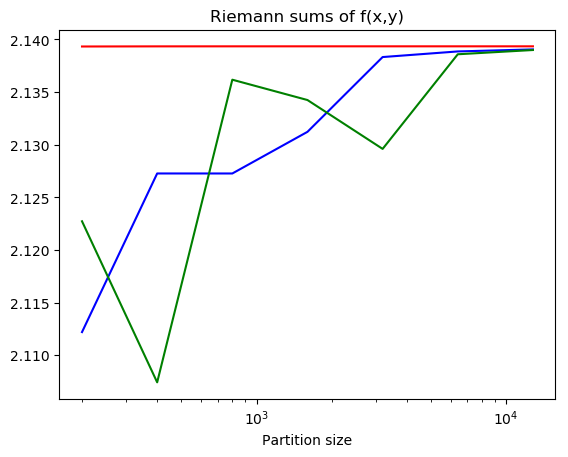

PyObject Text(0.5,1,'Riemann sums of f(x,y)')

In [19]:
S2 =map( num->RiemannSum(f, num, num, uniform_mesh=false), m)
S22=map( num->RiemannSum(f, num, num, uniform_mesh=false, random_selection=true), m)

semilogx(m, S1, "r")
semilogx(m, S2, "b")
semilogx(m, S22, "g")

xlabel("Partition size")
title("Riemann sums of f(x,y)")

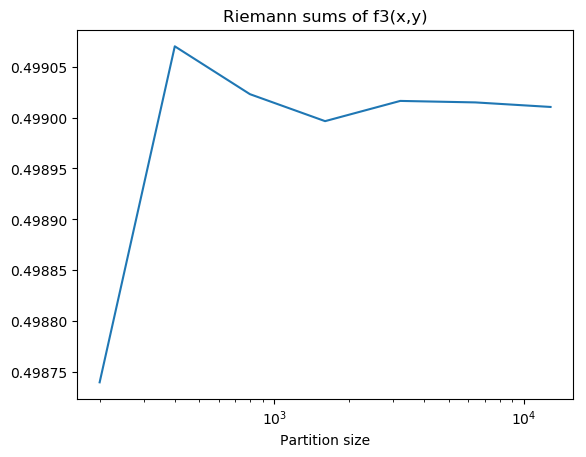

PyObject Text(0.5,1,'Riemann sums of f3(x,y)')

In [11]:
S3=map( num->RiemannSum(f3, num, num), m)
semilogx(m, S3)
xlabel("Partition size")
title("Riemann sums of f3(x,y)")

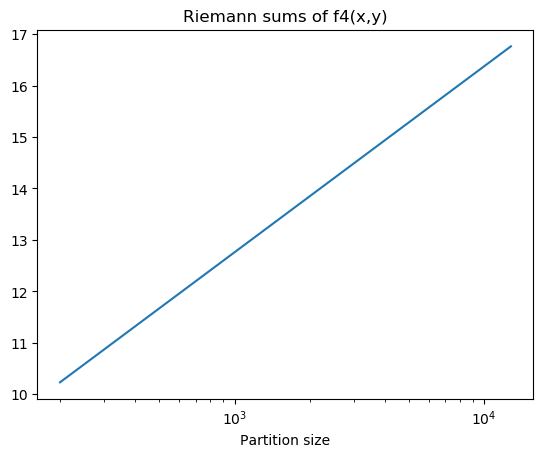

PyObject Text(0.5,1,'Riemann sums of f4(x,y)')

In [12]:
S4=map( num->RiemannSum(f4, num, num), m)
semilogx(m, S4)
xlabel("Partition size")
title("Riemann sums of f4(x,y)")

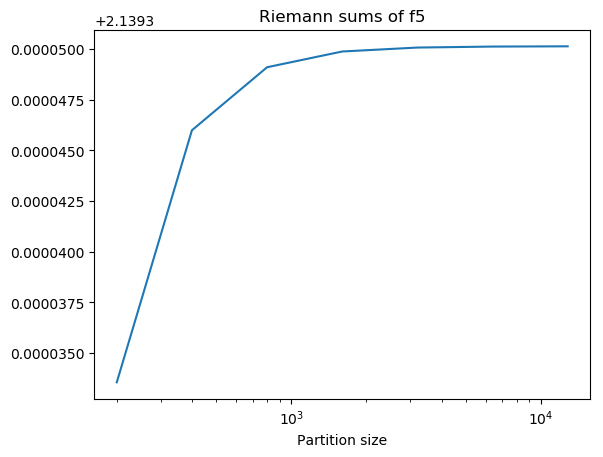

PyObject Text(0.5,1,'Riemann sums of f5')

In [13]:
S5=map( num->RiemannSum(f, num, num), m)
semilogx(m, S5)
xlabel("Partition size")
title("Riemann sums of f5")

**You need to know some important properties of the double integrals.**

* Under which conditions on $D$ and $f$ is $f$ **integrable**? (Theorem 1, p. 818)
    * $D$ is *closed* and *bounded* and whose boundary consists of finite number of curves of finite length
    * $f$ is continuous on $D$
    
(These are of course only sufficient conditions)

* Other important properties are summarized in the box in p.819 (p 794 Ed 7)


## Chap 14.2 Iteration of double integrals in Cartesian Coordinates

**Reduce a double integral into a series of one-variable integrals.**

$D$ is the region bounded by $a\le x\le b$ and $c(x)\le y \le d(x)$. ($D$ is an $x$-simple domain)

$$ \int\int_D f(x,y) dA \equiv \int_a^b dx \int_{c(x)}^{d(x)} f(x,y) dy = \int_a^b \left( \int_{c(x)}^{d(x)} f(x,y) dy\right) dx $$

* You see that for each value of $x$, the integral in $y$ is a one-variable integral, and can be regarded as a function of $x$:

$$ I(x):=\int_{c(x)}^{d(x)} f(x,y) dy $$

So 

$$ \int\int_D f(x,y) dA = \int_a^b I(x) dx $$


Similarly, if $D$ is the region bounded by $c\le y \le d$ and $a(y)\le x \le b(y)$ ($D$ is an $y$-simple domain)

$$ \int\int_D f(x,y) dA \equiv \int_c^d dy \int_{a(y)}^{b(y)} f(x,y) dx = \int_c^d \left( \int_{a(y)}^{d(y)} f(x,y) dx\right) dy $$

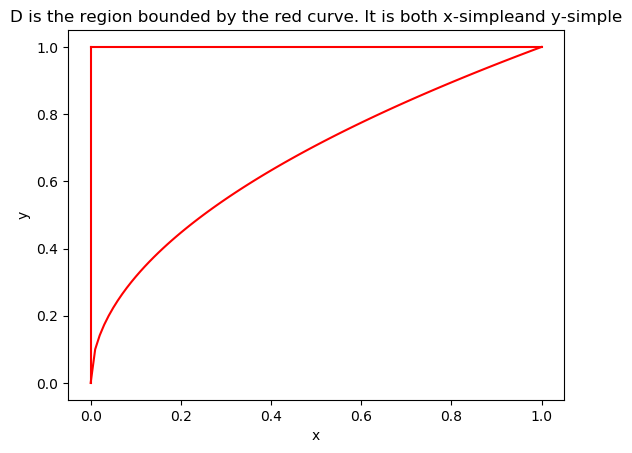

PyObject Text(30.8472,0.5,'y')

In [14]:
x=range(0, stop=1, length=101)

plot( x, sqrt.(x), "r")
plot(x, ones(size(x)), "r")
plot( zeros(size(x)), x, "r")

title("D is the region bounded by the red curve. It is both x-simpleand y-simple")
xlabel("x")
ylabel("y")

In [ ]:
Examples 1,2,3.

## Chap 14.3 Improper integrals and a mean-value theorem

For x-simple and y-simple domains, reduce the integration to one-variable improper integrals.

See Examples 1,2,3

**Theorem 3** (p.831) (Mean-value theorem)

## Chap 14.4 Double integrals in polar coordinates

**This is an important and very useful section.**

$$x(r,\theta)=rcos\theta,~~y(r\theta)=r\sin\theta $$

$$r(x,y) = \sqrt{x^2+y^2},~~\theta(x,y)=\arcsin(x/r)$$

We need to be careful about the range of $\theta$ and make the propriate choice.

Why are we doing this? Some functions and domains are easier to describe in the polar coordinates.

We would like to be able to to the following:

$$\int\int_D f(x(r,\theta),y(r,\theta)) dA = \int\int_D f(r, \theta) J(r,\theta) drd\theta$$

And vice versa.

In the Riemann sums using Cartesian coordinates:
$$ \Delta A_{i,j} = \Delta x_i\Delta y_j $$

Using polar coordinates: $r_i= i*\Delta r$, $\theta_j = j*\Delta\theta$

$$ \Delta A_{i,j} = r_i*\Delta\theta_j \Delta r_i $$

This gives how the area elements in the Cartesian coordinates and the polar coordinates scale:

In defining a double integral, it is important to specify which area element is used.

$$ dA=dxdy = r~dr~d\theta $$

or

$$ dA^* = dr~d\theta $$

$$\int\int_D f(r,\theta) dxdy=\int\int_D f(r,\theta) rdrd\theta $$

In [ ]:
Do Example 4.

### Change of variables formula for double integrals